Notebook to optimize the selection of models in an ensemble

In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
# Read the CSV files
predictions_df = pd.read_csv('pred_de_50.csv')  #path to the file with the prediction of all models in the ensemble
original_df = pd.read_csv('simulations\icse20\DAVE2-Track1-Normal\driving_log.csv')  # Replace 'path_to_original_file.csv' with the actual file path

# Select the 'steering angle' column from the original file
original_values = original_df['Steering Angle']

In [16]:
# Initialize lists to store the results
mse_scores = []
mae_scores = []

# Calculate MSE and MAE for each model
for col in predictions_df.columns:
    predicted_values = predictions_df[col]
    mse = mean_squared_error(original_values, predicted_values)
    mae = mean_absolute_error(original_values, predicted_values)
    mse_scores.append((col, mse))
    mae_scores.append((col, mae))

# Sort the lists by MSE and MAE
mse_scores.sort(key=lambda x: x[1])
mae_scores.sort(key=lambda x: x[1])

# Create DataFrames for rankings
mse_df = pd.DataFrame(mse_scores, columns=['Model', 'MSE'])
mae_df = pd.DataFrame(mae_scores, columns=['Model', 'MAE'])

In [17]:
# Print the DataFrames
print("Ranking by MSE:")
print(mse_df)

Ranking by MSE:
         Model           MSE
0     model_11  1.640623e-03
1     model_35  1.688309e-03
2     model_23  1.691743e-03
3     model_33  1.699124e-03
4     model_37  1.711519e-03
5     model_41  1.734696e-03
6     model_38  1.764686e-03
7     model_48  1.773480e-03
8     model_32  1.814778e-03
9     model_24  1.834662e-03
10    model_26  1.836606e-03
11    model_47  1.841240e-03
12    model_30  1.842610e-03
13     model_9  1.845779e-03
14    model_10  1.852053e-03
15    model_43  1.881354e-03
16     model_2  1.885061e-03
17    model_31  1.885886e-03
18    model_20  1.888709e-03
19    model_45  1.923346e-03
20    model_25  1.933345e-03
21    model_36  1.934669e-03
22     model_5  1.935123e-03
23     model_8  1.937990e-03
24    model_44  1.955994e-03
25     model_6  1.956146e-03
26    model_18  1.963737e-03
27    model_42  1.974234e-03
28    model_28  1.976230e-03
29    model_34  1.980013e-03
30    model_39  1.990387e-03
31    model_14  2.043526e-03
32    model_13  2.053898e-0

In [18]:
print("\nRanking by MAE:")
print(mae_df)


Ranking by MAE:
         Model          MAE
0     model_35     0.031779
1     model_23     0.031864
2     model_33     0.031891
3     model_11     0.031931
4     model_38     0.032058
5     model_41     0.032325
6     model_37     0.032328
7     model_26     0.032562
8     model_48     0.032679
9     model_47     0.032779
10    model_30     0.033202
11    model_10     0.033278
12    model_24     0.033290
13    model_32     0.033429
14     model_2     0.033866
15    model_31     0.034001
16     model_9     0.034151
17    model_43     0.034156
18    model_36     0.034189
19    model_45     0.034190
20    model_28     0.034485
21     model_6     0.034514
22     model_8     0.034523
23    model_20     0.034557
24    model_25     0.034620
25     model_5     0.034831
26    model_18     0.034867
27    model_39     0.034892
28    model_44     0.034948
29    model_34     0.035009
30    model_42     0.035066
31    model_13     0.035137
32    model_14     0.035259
33     model_1     0.035493
34 

In [19]:
# Select models for ensembles based on the MAE ranking
top_ranked_models = mae_df['Model'][:50].tolist()  # Select the top 10 models
bottom_ranked_models = mae_df['Model'][40:50].tolist()  # Select the bottom 10 models

# Create ensembles from the selected models
ensemble_top = predictions_df[top_ranked_models]
ensemble_bottom = predictions_df[bottom_ranked_models]

# Calculate uncertainty for each ensemble
uncertainty_top = ensemble_top.var(axis=1)
uncertainty_bottom = ensemble_bottom.var(axis=1)

In [20]:
ensemble_top

,model_35,model_23,model_33,model_11,model_38,model_41,model_37,model_26,model_48,model_47,...,model_3,model_27,model_17,model_49,model_29,model_4,model_16,model_19,model_22,model_12
0,-0.319132,-0.248943,-0.317413,-0.320428,-0.329784,-0.255596,-0.272881,-0.309708,-0.235693,-0.270571,...,-0.295038,-0.357859,-0.234322,-0.314540,-0.348940,-0.271360,-0.300319,-0.238084,-0.322946,-0.275000
1,-0.319132,-0.248943,-0.317413,-0.320428,-0.329784,-0.255596,-0.272881,-0.309708,-0.235693,-0.270571,...,-0.295038,-0.357859,-0.234322,-0.314540,-0.348940,-0.271360,-0.300319,-0.238084,-0.322946,-0.275000
2,-0.319132,-0.248943,-0.317413,-0.320428,-0.329784,-0.255596,-0.272881,-0.309708,-0.235693,-0.270571,...,-0.295038,-0.357859,-0.234322,-0.314540,-0.348940,-0.271360,-0.300319,-0.238084,-0.322946,-0.275000
3,0.088017,0.085353,0.018390,0.048041,0.082026,0.058940,0.046529,0.082157,0.010569,0.039384,...,0.009169,0.053231,0.074491,-0.008702,0.049355,0.035198,0.015745,0.083946,0.052386,0.039868
4,0.096394,0.082460,0.016804,0.053729,0.082296,0.056971,0.046546,0.078911,0.011865,0.035641,...,0.011629,0.054476,0.072735,-0.005098,0.046885,0.043523,0.016307,0.084516,0.050886,0.045945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027,-0.201402,-0.179253,-0.196465,-0.209743,-0.168892,-0.151059,-0.170989,-0.185638,-0.182169,-0.174800,...,-0.192785,-0.222675,-0.166092,-0.215555,-0.215983,-0.232294,-0.218002,-0.213902,-0.211548,-0.207891
11028,-0.190495,-0.184303,-0.192360,-0.191391,-0.163091,-0.179383,-0.159271,-0.177734,-0.174356,-0.154856,...,-0.170822,-0.221529,-0.151771,-0.220752,-0.191966,-0.240209,-0.218429,-0.208921,-0.203420,-0.204988
11029,-0.186157,-0.181309,-0.176100,-0.195588,-0.166563,-0.173660,-0.173179,-0.192947,-0.179177,-0.164898,...,-0.189004,-0.240371,-0.163953,-0.239137,-0.196980,-0.232775,-0.220978,-0.217487,-0.221597,-0.207764
11030,-0.198340,-0.178529,-0.188364,-0.198638,-0.153465,-0.143901,-0.175196,-0.191323,-0.172870,-0.185483,...,-0.196159,-0.226649,-0.175199,-0.228547,-0.205325,-0.237322,-0.221228,-0.215606,-0.212651,-0.193984


In [21]:
columns = ensemble_top.columns
columns

Index(['model_35', 'model_23', 'model_33', 'model_11', 'model_38', 'model_41',
       'model_37', 'model_26', 'model_48', 'model_47', 'model_30', 'model_10',
       'model_24', 'model_32', 'model_2', 'model_31', 'model_9', 'model_43',
       'model_36', 'model_45', 'model_28', 'model_6', 'model_8', 'model_20',
       'model_25', 'model_5', 'model_18', 'model_39', 'model_44', 'model_34',
       'model_42', 'model_13', 'model_14', 'model_1', 'model_46', 'model_15',
       'model_7', 'model_40', 'model_50', 'model_21', 'model_3', 'model_27',
       'model_17', 'model_49', 'model_29', 'model_4', 'model_16', 'model_19',
       'model_22', 'model_12'],
      dtype='object')

In [22]:
top_50 = list(range(50))
for i in range(50):
    j = int(columns[i].replace("model_",""))
    top_50[i] = j

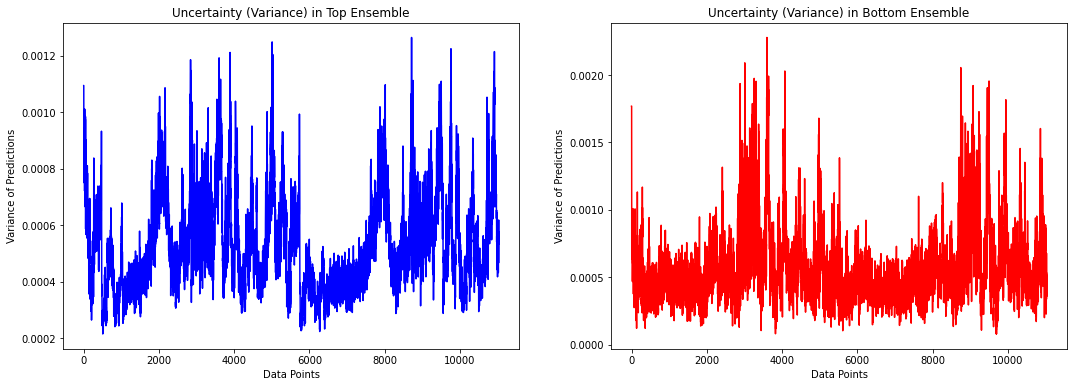

In [24]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for the top ensemble
ax1.plot(uncertainty_top, label='Top Ensemble', color='b')
ax1.set_title('Uncertainty (Variance) in Top Ensemble')
ax1.set_xlabel('Data Points')
ax1.set_ylabel('Variance of Predictions')

# Plot for the bottom ensemble
ax2.plot(uncertainty_bottom, label='Bottom Ensemble', color='r')
ax2.set_title('Uncertainty (Variance) in Bottom Ensemble')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('Variance of Predictions')

# Display the plots
plt.show()

Comparison

In [25]:
import pandas as pd

def calculate_metrics(csv_file_path):
    df = pd.read_csv(csv_file_path)

    # Define the three groups
    ood_extreme = df[df['simulation_name'].str.startswith('icse20')]
    mutants = df[df['simulation_name'].str.startswith('mutants')]
    ood_moderate = df[df['simulation_name'].str.startswith('ood')]

    # Calculate metrics for each group across different ttm values
    groups = {'OOD_extreme': ood_extreme, 'OOD_moderate': ood_moderate, 'mutants': mutants}
    metrics = ['precision', 'recall', 'f3']

    results = {}

    for group, data in groups.items():
        group_results = []
        for ttm in range(1, 4):
            ttm_data = data[data['ttm'] == ttm]
            group_scores = {}
            for metric in metrics:
                group_scores[metric] = ttm_data[metric].mean()
            group_results.append(group_scores)
        overall_scores = {}
        for metric in metrics:
            overall_scores[metric] = data[metric].mean()
        group_results.append(overall_scores)
        results[group] = pd.DataFrame(group_results, index=[f'ttm_{ttm}' for ttm in range(1, 4)] + ['overall'])

    # Calculate the average of all three groups
    overall_results = []
    for ttm in range(1, 4):
        ttm_scores = {}
        for metric in metrics:
            ttm_scores[metric] = sum(results[group][metric][f'ttm_{ttm}'] for group in results) / len(results)
        overall_results.append(ttm_scores)
    overall_scores = {}
    for metric in metrics:
        overall_scores[metric] = sum(results[group][metric]['overall'] for group in results) / len(results)
    overall_results.append(overall_scores)
    results['Overall_Average'] = pd.DataFrame(overall_results, index=[f'ttm_{ttm}' for ttm in range(1, 4)] + ['overall'])

    return results

In [26]:
results_top_10 = calculate_metrics('results/dynamic/t999/DE_top_10.csv')
results_mixed_10 = calculate_metrics('results/dynamic/t999/DE_mixed_10.csv')
results_bottom_10 = calculate_metrics('results/dynamic/t999/DE_bottom_10.csv')
results_top_12 = calculate_metrics('results/dynamic/t999/DE_top_12.csv')
results_top_15 = calculate_metrics('results/dynamic/t999/DE_top_15.csv')
results_top_20 = calculate_metrics('results/dynamic/t999/DE_top_20.csv')
results_DE_10 = calculate_metrics('results/dynamic/t999/dave2-track1-DE_10.csv')
results_DE_50 = calculate_metrics('results/dynamic/t999/dave2-track1-DE_50.csv')
results_DE_120 = calculate_metrics('results/dynamic/t999/dave2-track1-DE_120.csv')
results_top_50 = calculate_metrics('results/dynamic/t999/DE_top_50.csv')

In [27]:
for group, df in results_top_10.items():
    print(f"Group: {group}")
    print(df)

Group: OOD_extreme
         precision  recall     f3
ttm_1        100.0   100.0  100.0
ttm_2        100.0   100.0  100.0
ttm_3        100.0   100.0  100.0
overall      100.0   100.0  100.0
Group: OOD_moderate
          precision      recall          f3
ttm_1    100.000000  100.000000  100.000000
ttm_2    100.000000   98.214286   98.321429
ttm_3     67.857143   64.285714   64.500000
overall   89.285714   87.500000   87.607143
Group: mutants
         precision      recall          f3
ttm_1        100.0  100.000000  100.000000
ttm_2        100.0   96.055556   96.444444
ttm_3        100.0   84.222222   85.111111
overall      100.0   93.425926   93.851852
Group: Overall_Average
          precision      recall          f3
ttm_1    100.000000  100.000000  100.000000
ttm_2    100.000000   98.089947   98.255291
ttm_3     89.285714   82.835979   83.203704
overall   96.428571   93.641975   93.819665


In [28]:
print("\nOverall Average for Top 10:")
print(results_top_10['Overall_Average'])
print("\nOverall Average for Top 12:")
print(results_top_12['Overall_Average'])
print("\nOverall Average for Top 15:")
print(results_top_15['Overall_Average'])
print("\nOverall Average for Top 20:")
print(results_top_20['Overall_Average'])
print("\nOverall Average for DE 50:")
print(results_DE_50['Overall_Average'])


Overall Average for Top 10:
          precision      recall          f3
ttm_1    100.000000  100.000000  100.000000
ttm_2    100.000000   98.089947   98.255291
ttm_3     89.285714   82.835979   83.203704
overall   96.428571   93.641975   93.819665

Overall Average for Top 12:
         precision      recall         f3
ttm_1    91.142857  100.000000  98.809524
ttm_2    91.142857   97.978836  96.953704
ttm_3    83.576720   84.476190  83.769841
overall  88.620811   94.151675  93.177690

Overall Average for Top 15:
          precision      recall          f3
ttm_1    100.000000  100.000000  100.000000
ttm_2    100.000000   98.367725   98.514550
ttm_3     90.476190   84.396825   84.746032
overall   96.825397   94.254850   94.420194

Overall Average for Top 20:
         precision      recall         f3
ttm_1    85.759259  100.000000  97.992063
ttm_2    85.292328   98.682540  96.760582
ttm_3    79.115079   86.235450  85.041005
overall  83.388889   94.972663  93.264550

Overall Average for DE 

In [66]:
results_DE_50_99 = calculate_metrics('results/dynamic/t999/dave2-track1-DE_50.csv')
results_top_15_99 = calculate_metrics('results/dynamic/t99/DE_top_15.csv')
print("\nOverall Average for Top 15:")
print(results_top_15_99['Overall_Average'])
print("\nOverall Average for DE 50:")
print(results_DE_50_99['Overall_Average'])


Overall Average for Top 15:
         precision      recall         f3
ttm_1    68.568783  100.000000  94.658730
ttm_2    68.341270   99.611111  94.259259
ttm_3    66.678571   93.814815  89.063492
overall  67.862875   97.808642  92.660494

Overall Average for DE 50:
          precision      recall          f3
ttm_1    100.000000  100.000000  100.000000
ttm_2    100.000000   99.000000   99.092593
ttm_3     88.624339   83.529101   83.842593
overall   96.208113   94.176367   94.311728
